In [25]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
import sklearn
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [26]:
all_data=pd.read_csv("HDFCBANK.csv",na_values=None,index_col='Date',parse_dates=True,infer_datetime_format=True)
all_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN


In [27]:
features = ['Close']
eval_data= pd.DataFrame(columns=features, data=all_data, index=all_data.index)
eval_data.head()

,Close
Date,
2000-01-03,170.00
2000-01-04,173.80
2000-01-05,166.95
2000-01-06,168.30
2000-01-07,168.35


(array([728659., 730120., 731581., 733042., 734503., 735964., 737425.,
        738886.]), <a list of 8 Text major ticklabel objects>)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 1.0, 'The close values of HDFCBANK stock equity')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'close values')

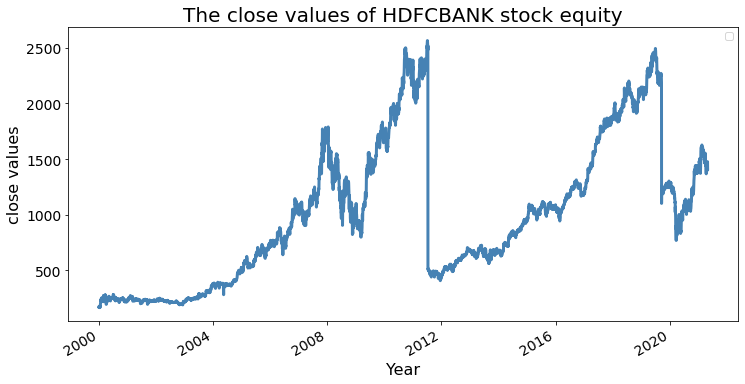

In [28]:
# line plot - the yearly accumulated rainfall in Barcelona
eval_data.plot(color='steelblue', linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend('')

# title and labels
plt.title('The close values of HDFCBANK stock equity', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('close values', fontsize=16)

In [29]:
eval_data['SMA_100'] = eval_data['Close'].rolling(100, min_periods=1).mean()

In [30]:
eval_data.head()

,Close,SMA_100
Date,,
2000-01-03,170.00,170.0000
2000-01-04,173.80,171.9000
2000-01-05,166.95,170.2500
2000-01-06,168.30,169.7625
2000-01-07,168.35,169.4800


(array([728659., 730120., 731581., 733042., 734503., 735964., 737425.,
        738886.]), <a list of 8 Text major ticklabel objects>)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 1.0, 'The close values of HDFCBANK stock equity')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'close values')

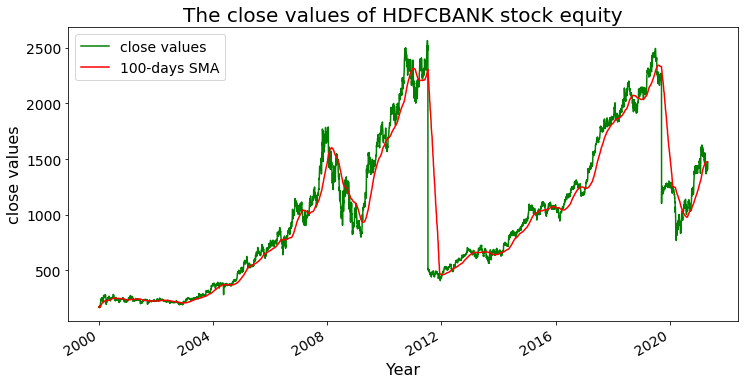

In [31]:
# colors for the line plot
colors = ['green', 'red']

# line plot - the yearly average air temperature in Barcelona
eval_data.plot(color=colors, linewidth=1.5, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['close values', '100-days SMA'], fontsize=14)

# title and labels
plt.title('The close values of HDFCBANK stock equity', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('close values', fontsize=16)

In [32]:
eval_data['SMA_200'] = eval_data['Close'].rolling(200, min_periods=1).mean()

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'The close values of HDFCBANK stock equity')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'close values')

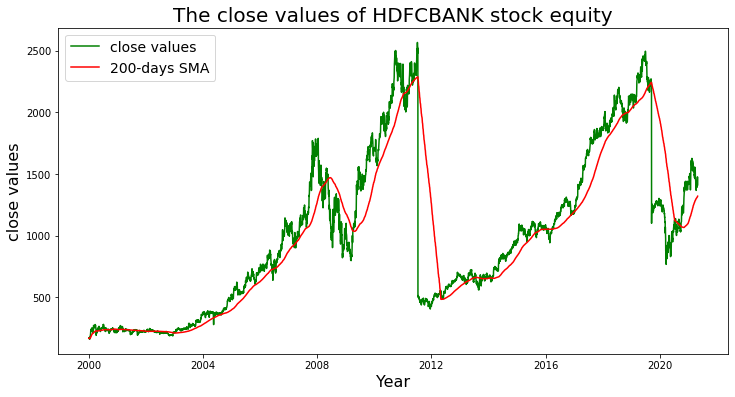

In [33]:
import matplotlib.pyplot as plt
# plot lines
plt.figure(figsize=(12, 6))
plt.title('The close values of HDFCBANK stock equity', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('close values', fontsize=16)
plt.plot(eval_data.index,eval_data['Close'], color='green',linewidth=1.5)
plt.plot(eval_data.index,eval_data['SMA_200'],color='red',linewidth=1.5)
plt.legend(labels =['close values', '200-days SMA'], fontsize=14)
plt.show()

In [34]:
eval_data.head()

,Close,SMA_100,SMA_200
Date,,,
2000-01-03,170.00,170.0000,170.0000
2000-01-04,173.80,171.9000,171.9000
2000-01-05,166.95,170.2500,170.2500
2000-01-06,168.30,169.7625,169.7625
2000-01-07,168.35,169.4800,169.4800


In [37]:
eval_data['EMA_100'] = eval_data['Close'].ewm(span=100, adjust=False).mean()
eval_data['EMA_200'] = eval_data['Close'].ewm(span=200, adjust=False).mean()

In [38]:
eval_data.head()

,Close,SMA_100,SMA_200,EMA_100,EMA_200
Date,,,,,
2000-01-03,170.00,170.0000,170.0000,170.000000,170.000000
2000-01-04,173.80,171.9000,171.9000,170.075248,170.037811
2000-01-05,166.95,170.2500,170.2500,170.013361,170.007086
2000-01-06,168.30,169.7625,169.7625,169.979433,169.990101
2000-01-07,168.35,169.4800,169.4800,169.947167,169.973781


<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'The close values of HDFCBANK stock equity')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'close values')

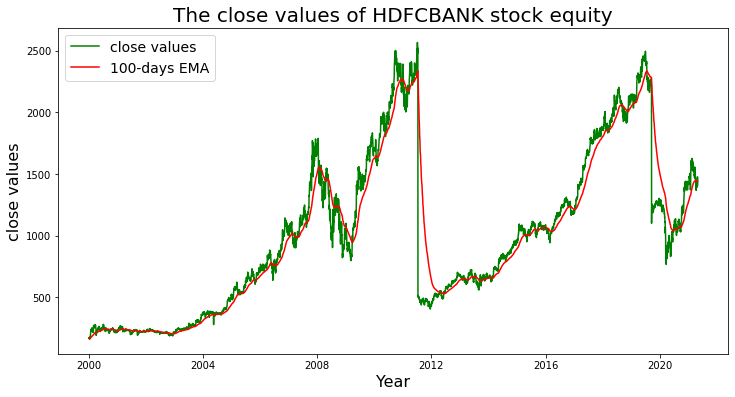

In [39]:
import matplotlib.pyplot as plt
# plot lines
plt.figure(figsize=(12, 6))
plt.title('The close values of HDFCBANK stock equity', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('close values', fontsize=16)
plt.plot(eval_data.index,eval_data['Close'], color='green',linewidth=1.5)
plt.plot(eval_data.index,eval_data['EMA_100'],color='red',linewidth=1.5)
plt.legend(labels =['close values', '100-days EMA'], fontsize=14)
plt.show()

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'The close values of HDFCBANK stock equity')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'close values')

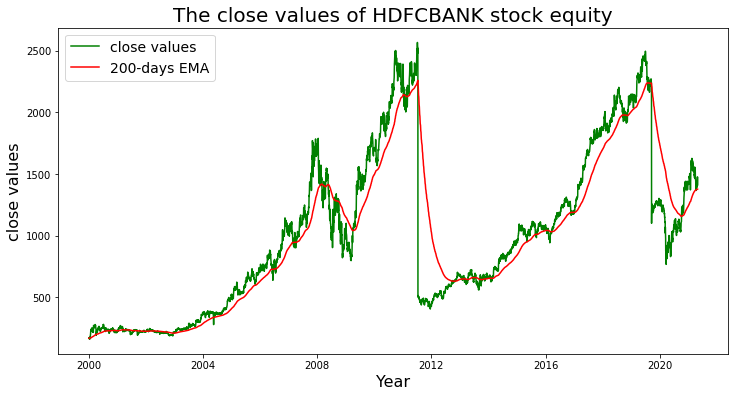

In [40]:
import matplotlib.pyplot as plt
# plot lines
plt.figure(figsize=(12, 6))
plt.title('The close values of HDFCBANK stock equity', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('close values', fontsize=16)
plt.plot(eval_data.index,eval_data['Close'], color='green',linewidth=1.5)
plt.plot(eval_data.index,eval_data['EMA_200'],color='red',linewidth=1.5)
plt.legend(labels =['close values', '200-days EMA'], fontsize=14)
plt.show()

In [41]:
eval_data.head()
eval_data.info()

,Close,SMA_100,SMA_200,EMA_100,EMA_200
Date,,,,,
2000-01-03,170.00,170.0000,170.0000,170.000000,170.000000
2000-01-04,173.80,171.9000,171.9000,170.075248,170.037811
2000-01-05,166.95,170.2500,170.2500,170.013361,170.007086
2000-01-06,168.30,169.7625,169.7625,169.979433,169.990101
2000-01-07,168.35,169.4800,169.4800,169.947167,169.973781


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5306 entries, 2000-01-03 to 2021-04-30
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Close    5306 non-null   float64
 1   SMA_100  5306 non-null   float64
 2   SMA_200  5306 non-null   float64
 3   EMA_100  5306 non-null   float64
 4   EMA_200  5306 non-null   float64
dtypes: float64(5)
memory usage: 248.7 KB


In [42]:
Close_list = eval_data['Close'].tolist()
SMA_100_list=eval_data['SMA_100'].tolist()
SMA_200_list=eval_data['SMA_200'].tolist()
EMA_100_list=eval_data['EMA_100'].tolist()
EMA_200_list=eval_data['EMA_200'].tolist()
close_list_small=Close_list[0:101]
#close_list_small
len(Close_list)

5306

In [43]:
from statsmodels.stats.weightstats import ztest
ztest_Score, p_value= ztest(close_list_small, value =close_list_small[100], alternative='two-sided')
print(ztest_Score, p_value)

2.801098971783475 0.005092889688467411


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [45]:
true_count=0
false_count=0
flag=100
if(p_value)<0.05:
  print("Reject NULL hypothesis")
  if(close_list_small[98]<SMA_100_list[99]):
    flag=1
    print("stock price is likely to increase tomorrow\n","previous day value is:",close_list_small[99],"moving average is:",SMA_100_list[99])
  else:
    flag=0
    print("stock price is likely to decrease tomorrow","previous day value is:",close_list_small[99],"moving average is:",SMA_100_list[99])
else:
  flag=2
  print("Accept NULL hypothesis")
  print("previous value is almost equal to",close_list_small[99])

if(flag==1 and close_list_small[100]>close_list_small[99]):
  true_count=true_count+1
elif(flag==1 and close_list_small[100]<close_list_small[99]):
  false_count=false_count+1
if(flag==0 and close_list_small[100]<close_list_small[99]):
  true_count=true_count+1
elif(flag==0 and close_list_small[100]>close_list_small[99]):
  false_count=false_count+1
if(flag==2 and close_list_small[100]==close_list_small[99]):
  true_count=true_count+1
elif(flag==2 and close_list_small[100]!=close_list_small[99]):
  false_count=false_count+1

print("previous vale is:",close_list_small[99])
print("next day value is:",close_list_small[100])
print("true count is",true_count)
print("false count is",false_count)


Reject NULL hypothesis
stock price is likely to increase tomorrow
 previous day value is: 224.65 moving average is: 232.6205
previous vale is: 224.65
next day value is: 223.8
true count is 0
false count is 1


In [46]:
true_count=0
false_count=0
n=100
total=len(Close_list)-n-2
print("total is",total)
for i in range(0,total):
  flag=100
  close_list_small=Close_list[i:n+i+2]
  #print(close_list_small)
  ztest_Score, p_value= ztest(close_list_small, value =close_list_small[n], alternative='two-sided')
  #print(t_statistic , p_value)
  if(p_value)<0.05:
    #print("Reject NULL hypothesis")
    if(close_list_small[n-1]<SMA_100_list[n+i]):
      flag=1
      #print("stock price is likely to increase tomorrow\n","previous day value is:",close_list_small[19],"moving average is:",SMA_7_list[19+i])
    else:
      flag=0
      #print("stock price is likely to decrease tomorrow","previous day value is:",close_list_small[19],"moving average is:",SMA_7_list[19+i])
  else:
    flag=2
    #print("Accept NULL hypothesis")
    #print("previous value is almost equal to",close_list_small[19+i])
  var1=close_list_small[n+1]
  var2=close_list_small[n]

  if(flag==1 and var1>=var2):
    true_count=true_count+1
  elif(flag==1 and var1<var2):
    false_count=false_count+1

  if(flag==0 and var1<=var2):
    true_count=true_count+1
  elif(flag==0 and var1>var2):
    false_count=false_count+1
  if(flag==2):
    true_count=true_count+1
    #print("var1 is",var1)
    #print("var2 is",var2)
  #print("previous vale is:",close_list_small[i])
  #print("next day value is:",close_list_small[i+1])
  #print("true count is",true_count)
  #print("false count is",false_count)
print("true count is",true_count)
print("false count is",false_count)

total is 5204
true count is 2798
false count is 2406


In [47]:
print("true_count+false_count",true_count+false_count)
efficiency=(true_count)*100/(true_count+false_count)
print("efficiency is",efficiency)

true_count+false_count 5204
efficiency is 53.766333589546505


In [48]:
true_count=0
false_count=0
n=200
total=len(Close_list)-n-2
print("total is",total)
for i in range(0,total):
  flag=100
  close_list_small=Close_list[i:n+i+2]
  #print(close_list_small)
  ztest_Score, p_value= ztest(close_list_small, value =close_list_small[n], alternative='two-sided')
  #print(t_statistic , p_value)
  if(p_value)<0.05:
    #print("Reject NULL hypothesis")
    if(close_list_small[n-1]<SMA_200_list[n+i]):
      flag=1
      #print("stock price is likely to increase tomorrow\n","previous day value is:",close_list_small[19],"moving average is:",SMA_7_list[19+i])
    else:
      flag=0
      #print("stock price is likely to decrease tomorrow","previous day value is:",close_list_small[19],"moving average is:",SMA_7_list[19+i])
  else:
    flag=2
    #print("Accept NULL hypothesis")
    #print("previous value is almost equal to",close_list_small[19+i])
  var1=close_list_small[n+1]
  var2=close_list_small[n]

  if(flag==1 and var1>=var2):
    true_count=true_count+1
  elif(flag==1 and var1<var2):
    false_count=false_count+1

  if(flag==0 and var1<=var2):
    true_count=true_count+1
  elif(flag==0 and var1>var2):
    false_count=false_count+1
  if(flag==2):
    true_count=true_count+1
    #print("var1 is",var1)
    #print("var2 is",var2)
  #print("previous vale is:",close_list_small[i])
  #print("next day value is:",close_list_small[i+1])
  #print("true count is",true_count)
  #print("false count is",false_count)
print("true count is",true_count)
print("false count is",false_count)

total is 5104
true count is 2754
false count is 2350


In [49]:
print("true_count+false_count",true_count+false_count)
efficiency=(true_count)*100/(true_count+false_count)
print("efficiency is",efficiency)

true_count+false_count 5104
efficiency is 53.957680250783696


In [50]:
true_count=0
false_count=0
n=100
total=len(Close_list)-n-2
print("total is",total)
for i in range(0,total):
  flag=100
  close_list_small=Close_list[i:n+i+2]
  #print(close_list_small)
  ztest_Score, p_value= ztest(close_list_small, value =close_list_small[n], alternative='two-sided')
  #print(t_statistic , p_value)
  if(p_value)<0.05:
    #print("Reject NULL hypothesis")
    if(close_list_small[n-1]<EMA_100_list[n+i]):
      flag=1
      #print("stock price is likely to increase tomorrow\n","previous day value is:",close_list_small[19],"moving average is:",SMA_7_list[19+i])
    else:
      flag=0
      #print("stock price is likely to decrease tomorrow","previous day value is:",close_list_small[19],"moving average is:",SMA_7_list[19+i])
  else:
    flag=2
    #print("Accept NULL hypothesis")
    #print("previous value is almost equal to",close_list_small[19+i])
  var1=close_list_small[n+1]
  var2=close_list_small[n]

  if(flag==1 and var1>=var2):
    true_count=true_count+1
  elif(flag==1 and var1<var2):
    false_count=false_count+1

  if(flag==0 and var1<=var2):
    true_count=true_count+1
  elif(flag==0 and var1>var2):
    false_count=false_count+1
  if(flag==2):
    true_count=true_count+1
    #print("var1 is",var1)
    #print("var2 is",var2)
  #print("previous vale is:",close_list_small[i])
  #print("next day value is:",close_list_small[i+1])
  #print("true count is",true_count)
  #print("false count is",false_count)
print("true count is",true_count)
print("false count is",false_count)

total is 5204
true count is 2829
false count is 2375


In [51]:
print("true_count+false_count",true_count+false_count)
efficiency=(true_count)*100/(true_count+false_count)
print("efficiency is",efficiency)

true_count+false_count 5204
efficiency is 54.36202920830131


In [52]:
true_count=0
false_count=0
n=200
total=len(Close_list)-n-2
print("total is",total)
for i in range(0,total):
  flag=100
  close_list_small=Close_list[i:n+i+2]
  #print(close_list_small)
  ztest_Score, p_value= ztest(close_list_small, value =close_list_small[n], alternative='two-sided')
  #print(t_statistic , p_value)
  if(p_value)<0.05:
    #print("Reject NULL hypothesis")
    if(close_list_small[n-1]<EMA_200_list[n+i]):
      flag=1
      #print("stock price is likely to increase tomorrow\n","previous day value is:",close_list_small[19],"moving average is:",SMA_7_list[19+i])
    else:
      flag=0
      #print("stock price is likely to decrease tomorrow","previous day value is:",close_list_small[19],"moving average is:",SMA_7_list[19+i])
  else:
    flag=2
    #print("Accept NULL hypothesis")
    #print("previous value is almost equal to",close_list_small[19+i])
  var1=close_list_small[n+1]
  var2=close_list_small[n]

  if(flag==1 and var1>=var2):
    true_count=true_count+1
  elif(flag==1 and var1<var2):
    false_count=false_count+1

  if(flag==0 and var1<=var2):
    true_count=true_count+1
  elif(flag==0 and var1>var2):
    false_count=false_count+1
  if(flag==2):
    true_count=true_count+1
    #print("var1 is",var1)
    #print("var2 is",var2)
  #print("previous vale is:",close_list_small[i])
  #print("next day value is:",close_list_small[i+1])
  #print("true count is",true_count)
  #print("false count is",false_count)
print("true count is",true_count)
print("false count is",false_count)

total is 5104
true count is 2779
false count is 2325


In [53]:
print("true_count+false_count",true_count+false_count)
efficiency=(true_count)*100/(true_count+false_count)
print("efficiency is",efficiency)

true_count+false_count 5104
efficiency is 54.44749216300941


In [56]:
!jupyter nbconvert StockMarketPrediction_SMA_EMA_Z_test.ipynb

[NbConvertApp] Converting notebook StockMarketPrediction_SMA_EMA_Z_test.ipynb to html
[NbConvertApp] Writing 681389 bytes to StockMarketPrediction_SMA_EMA_Z_test.html
